<a href="https://colab.research.google.com/github/elizavetakotelnikova/Basic_statistics_projects/blob/main/ANOVA_second.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

URL = 'https://stepik.org/media/attachments/lesson/9250/birds.csv'
df = pd.read_csv(URL)
df

,var4,hormone,sex
0,17.859039,1,1
1,20.842343,1,1
2,19.318099,1,1
3,20.064451,1,1
4,17.620316,1,1
...,...,...,...
59,17.054195,0,0
60,22.951551,0,0
61,18.799382,0,0
62,16.543161,0,0


In [12]:
df.columns

Index(['var4', 'hormone', 'sex'], dtype='object')

<Axes: title={'center': 'var4'}, xlabel='hormone'>

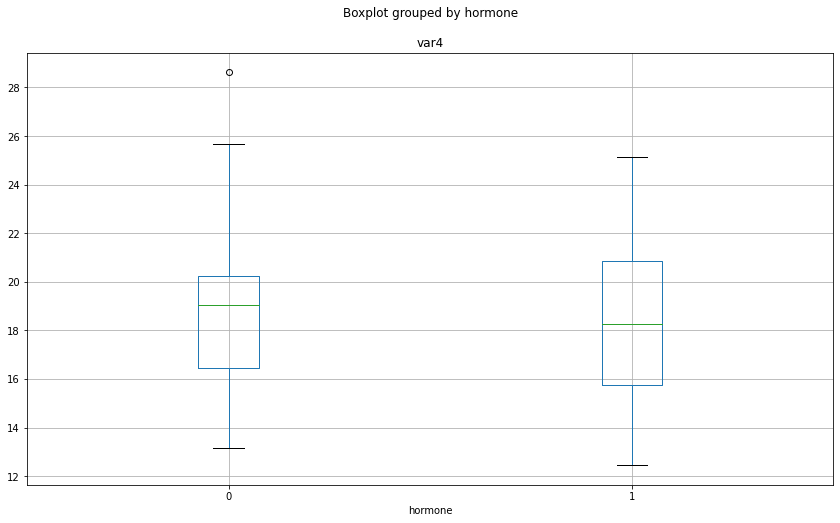

In [13]:
df.boxplot('var4', by= 'hormone', figsize=(14, 8), grid=True)

<Axes: title={'center': 'var4'}, xlabel='sex'>

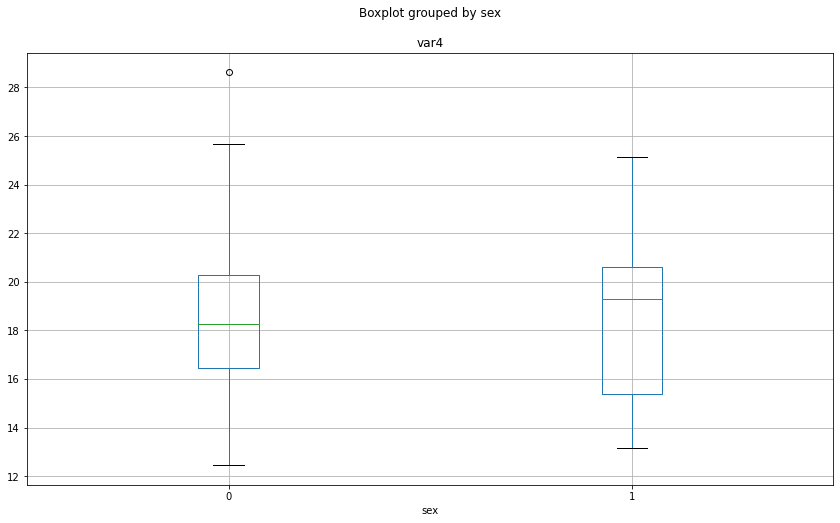

In [14]:
df.boxplot('var4', by= 'sex', figsize=(14, 8), grid=True)

Seems like factors by itself don't have a big impact on results. Should check by ANOVA, if groups combined by two factors have something interesting.

<Axes: xlabel='hormone', ylabel='var4'>

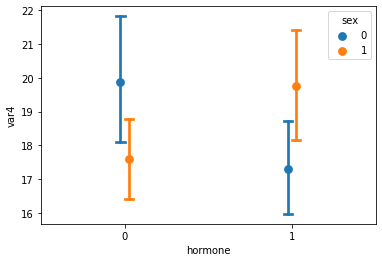

In [19]:
sns.pointplot(data = df, x = "hormone", y = "var4", hue = "sex", join = False, dodge = True, capsize = 0.05)

In [15]:
# ANOVA, var4 ~ age * dose

model = ols('var4 ~ hormone * sex', data=df).fit()
anova_table = sm.stats.anova_lm(model, type=2)

print(anova_table)

               df      sum_sq    mean_sq         F    PR(>F)
hormone       1.0    0.847472   0.847472  0.086528  0.769653
sex           1.0    0.119762   0.119762  0.012228  0.912318
hormone:sex   1.0   89.483384  89.483384  9.136390  0.003682
Residual     60.0  587.650394   9.794173       NaN       NaN


# Conclusion
As we can see, there isn't a statistically significant difference between results, if we group only by sex or only by hormone (p-values > 0.05). But it is clear that the combination of hormone & sex has an impact (p value is < 0.05, is 0.037 and F-value 9.137).